# ComCamSim 2024 DIA Sprint
Authors: Michael Wood-Vasey <wmwv@pitt.edu>  
Last Verified to Run: 2024-05-14  

DIA Sprint

1. [x] Count dipoles and plot on image
2. [ ] Look at dipoles
3. [ ] Look at pixel stamps
4. [ ] Spatially plot dipole orientation
5. [ ] Plot w.r.t. Parallactic Angle.

Run at RSP on USDF.  Run using `d_2024_5_14`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from lsst.daf.butler import Butler

In [4]:
from astropy.visualization import ZScaleInterval, SqrtStretch, ImageNormalize, MinMaxInterval, LogStretch
from astropy.table import Table, join
import lsst.daf.butler as dafButler
from lsst.daf.butler import DatasetNotFoundError
from lsst.pipe.base import Instrument
from lsst.ap.association.transformDiaSourceCatalog import UnpackApdbFlags
import lsst.afw.display as afwDisplay
import lsst.display.astrowidgets
afwDisplay.setDefaultBackend('astrowidgets')

Key orientation information: repo, collection, dataset types.

In [8]:
repo = "/repo/embargo"
collection = "u/elhoward/DM-44138/LSSTComCamSim"
collections = [collection, "LSSTComCamSim/templates", "LSSTComCamSim/defaults"]
instrument = "LSSTComCamSim"

Dataset Types we'll be interested in  
`postISRCCD`  (I don't think there's a `calexp` in prompt processing)  
`goodSeeingDiff_differenceExp`  
`goodSeeingDiff_diaSrc`  (or `goodSeeingDiff_diaSrcTable` depending on the schema you want.)

In [9]:
butler = Butler(repo, collections=collections, instrument=instrument)

In [11]:
registry = butler.registry
for ref in registry.queryDatasets('raw'):
    print(ref.dataId)

{instrument: 'LSSTComCamSim', detector: 8, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 1, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 4, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 2, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 6, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 0, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 5, exposure: 7024022200001, band: 'unknown', day_obs: 20240222, group: 'test',

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
registry = butler.registry
for ref in registry.queryDatasets('postISRCCD'):
    print(ref.dataId)

{instrument: 'LSSTComCamSim', detector: 5, exposure: 7024040300067, band: 'i', day_obs: 20240403, group: '2024-04-04T00:20:05.772', physical_filter: 'i_06'}
{instrument: 'LSSTComCamSim', detector: 4, exposure: 7024040300136, band: 'r', day_obs: 20240403, group: '2024-04-04T01:14:52.780', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 4, exposure: 7024040300426, band: 'r', day_obs: 20240403, group: '2024-04-04T05:13:55.079', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 2, exposure: 7024040400619, band: 'i', day_obs: 20240404, group: '2024-04-05T07:55:11.192', physical_filter: 'i_06'}
{instrument: 'LSSTComCamSim', detector: 7, exposure: 7024040300652, band: 'r', day_obs: 20240403, group: '2024-04-04T08:41:33.799', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 4, exposure: 7024040200132, band: 'r', day_obs: 20240402, group: '2024-04-03T01:12:08.254', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 5, exposure: 70240

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [13]:
registry = butler.registry
for ref in registry.queryDatasets('goodSeeingDiff_differenceExp'):
    print(ref.dataId)

{instrument: 'LSSTComCamSim', detector: 4, visit: 7024040300630, band: 'g', day_obs: 20240403, physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 7, visit: 7024040200607, band: 'i', day_obs: 20240402, physical_filter: 'i_06'}
{instrument: 'LSSTComCamSim', detector: 8, visit: 7024040400242, band: 'i', day_obs: 20240404, physical_filter: 'i_06'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040200608, band: 'i', day_obs: 20240402, physical_filter: 'i_06'}
{instrument: 'LSSTComCamSim', detector: 2, visit: 7024040400358, band: 'i', day_obs: 20240404, physical_filter: 'i_06'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040300399, band: 'g', day_obs: 20240403, physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 0, visit: 7024040300358, band: 'r', day_obs: 20240403, physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040400088, band: 'g', day_obs: 20240404, physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 

In [14]:
data_id = {"detector": 0, "exposure": 7024040400021}

raw = butler.get("raw", dataId=data_id)
post_isr_ccd = butler.get("postISRCCD", dataId=data_id)

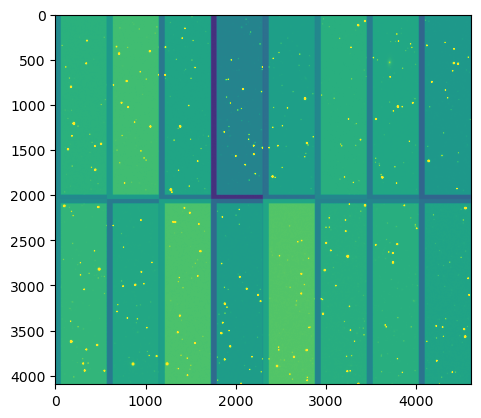

In [15]:
norm = ImageNormalize(raw.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(raw.image.array, norm=norm)
plt.show()

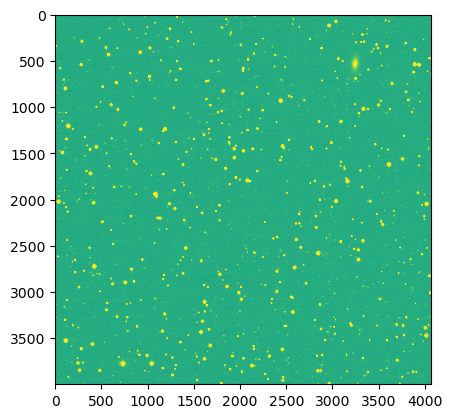

In [16]:
norm = ImageNormalize(post_isr_ccd.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(post_isr_ccd.image.array, norm=norm)
plt.show()

In [17]:
# Now we have to rename "exposure" -> "visit"?  Why?  This is confusing
data_id["visit"] = data_id["exposure"]

diff_exp = butler.get("goodSeeingDiff_differenceExp", dataId=data_id)
# dia_src = butler.get("goodSeeingDiff_diaSrc", dataId=data_id)

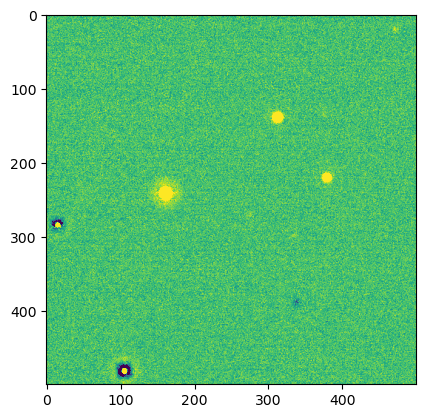

In [18]:
small = diff_exp.image.array[500:1000,500:1000]
norm = ImageNormalize(small, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(small, norm=norm)
plt.show()

In [19]:
# These are the runs that this chained collection is derived from
butler.registry.queryCollections(collection, flattenChains=True)

['u/elhoward/DM-44138/LSSTComCamSim/20240513T173539Z',
 'u/elhoward/DM-44138/LSSTComCamSim/20240510T175057Z',
 'u/elhoward/DM-44138/LSSTComCamSim/20240509T163833Z',
 'LSSTComCamSim/raw/all',
 'LSSTComCamSim/calib/DM-43441',
 'LSSTComCamSim/calib/DM-43441/unbounded',
 'u/erykoff/DM-43224/abrought-bfk/bfk.20240308a',
 'LSSTComCamSim/calib/DM-42287',
 'LSSTComCamSim/fgcmcal/lookuptable/DM-43441',
 'skymaps',
 'refcats/DM-28636',
 'refcats/DM-33444',
 'refcats/DM-39298',
 'refcats/DM-42510',
 'pretrained_models/rbResnet50-DC2',
 'u/homer/w_2024_12/DM-43439/20240323T142118Z']

In [20]:
# Catalog from raw pipeline output is a `lsst.afw.table.SourceCatalog` and includes 100 blank "sky" sources
full_cat = butler.get("goodSeeingDiff_diaSrc", dataId=data_id )
# The diaSrcTable has things in SDMified form and will be a `DataFrame` and has removed the blank sky sources.
filtered_transformed_cat = butler.get("goodSeeingDiff_diaSrcTable", dataId=data_id )

In [48]:
dia_sources = full_cat[full_cat["sky_source"] == False]
sky_sources = full_cat[full_cat["sky_source"] == True]

dipoles = dia_sources[dia_sources["ip_diffim_DipoleFit_flag_classification"]]

In [49]:
print(f"{len(filtered_transformed_cat)} total detections.")
print(f"{len(dipoles)} detections classified as dipoles.")

237 total detections.
99 detections classified as dipoles.


In [50]:
import lsst.afw.display
display = lsst.afw.display.Display(backend="firefly") 

In [51]:
display.image(diff_exp)
display.centroids(dia_sources, size=10, ctype="red")
display.centroids(dipoles, size=15, ctype="orange")
display.centroids(sky_sources, size=20, ctype="green")